Saving Weather Data Set.csv to Weather Data Set (6).csv
Outlier Counts:
 {'MinTemp': np.int64(82), 'MaxTemp': np.int64(544), 'Rainfall': np.int64(23723), 'Evaporation': np.int64(29631), 'Sunshine': np.int64(45567), 'WindGustSpeed': np.int64(5523), 'WindSpeed9am': np.int64(1817), 'WindSpeed3pm': np.int64(2523), 'Humidity9am': np.int64(1425), 'Humidity3pm': np.int64(0), 'Pressure9am': np.int64(2758), 'Pressure3pm': np.int64(2524), 'Cloud9am': np.int64(0), 'Cloud3pm': np.int64(4974), 'Temp9am': np.int64(307), 'Temp3pm': np.int64(988)}
Before Mean/Median (Rainfall):
 2.3608975663412624 0.0


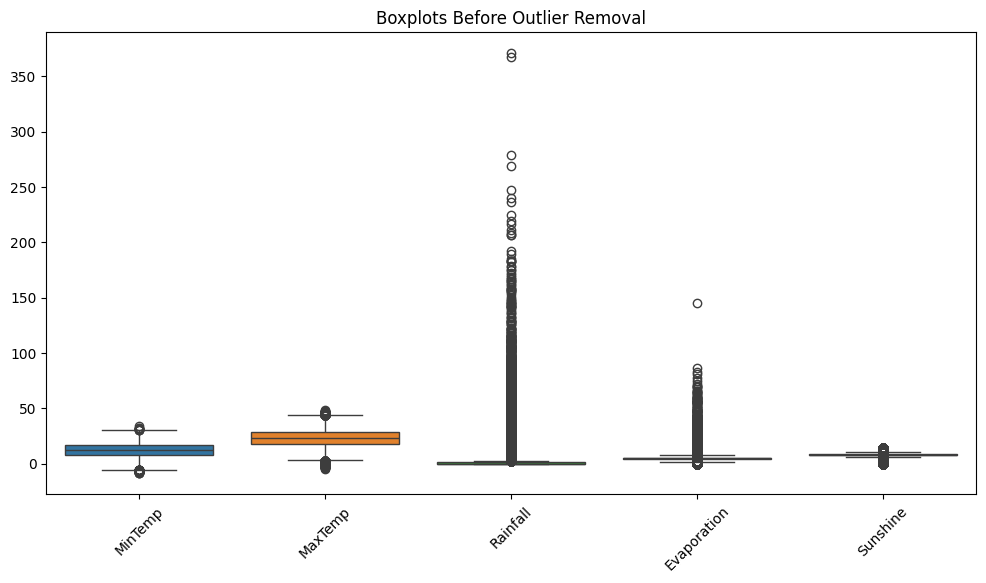

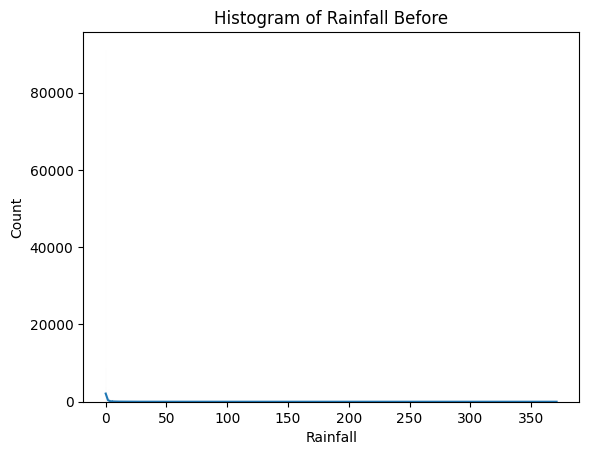

After Mean/Median (Rainfall):
 0.6144820569228654 0.0


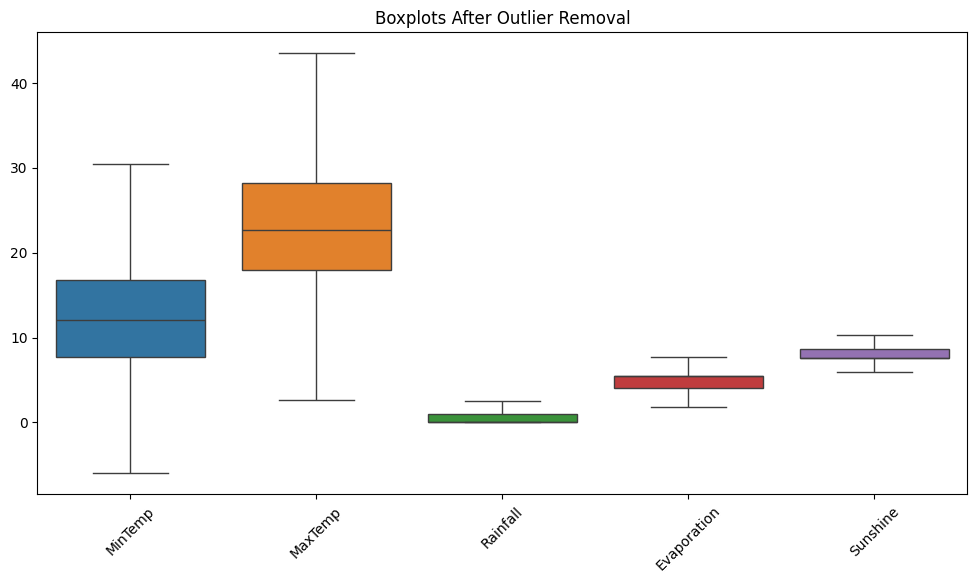

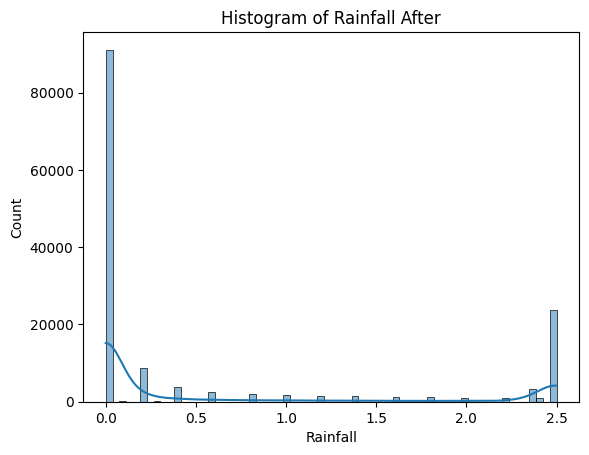

Outlier removal completed. Data saved as 'outliers_removed_weather_data.csv'


In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Upload dataset
from google.colab import files
uploaded = files.upload()

# Load the data
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# EDA: Calculate outlier counts (using IQR)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    outlier_counts[col] = outliers

print("Outlier Counts:\n", outlier_counts)

# Compare distributions before
print("Before Mean/Median (Rainfall):\n", df['Rainfall'].mean(), df['Rainfall'].median())

# Visualizations (before)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols[:5]])  # First few for example
plt.title('Boxplots Before Outlier Removal')
plt.xticks(rotation=45)
plt.show()

sns.histplot(df['Rainfall'], kde=True)
plt.title('Histogram of Rainfall Before')
plt.show()

# Preprocessing: Remove/clip outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)  # Clip to avoid data loss

# EDA after: Compare distributions
print("After Mean/Median (Rainfall):\n", df['Rainfall'].mean(), df['Rainfall'].median())

# Visualizations (after)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols[:5]])
plt.title('Boxplots After Outlier Removal')
plt.xticks(rotation=45)
plt.show()

sns.histplot(df['Rainfall'], kde=True)
plt.title('Histogram of Rainfall After')
plt.show()

# Save the processed dataframe for the next member
df.to_csv('outliers_removed_weather_data.csv', index=False)
print("Outlier removal completed. Data saved as 'outliers_removed_weather_data.csv'")